<h1 style="text-align:center"> Image Classification using Convolutional Neural Networks built using TensorFlow </h1>

## Importing MNIST dataset

The MNIST is a database of handwritten digits that has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image

In [6]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf


In [7]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

The features data are between 0 and 255 .Normalizing this to improve optimization performance

In [8]:
#normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
print("categorical labels")
print(y_train[0:5])

# make labels one hot encoded
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

print("one hot encoded labels")
print(y_train[0:5])

categorical labels
[5 0 4 1 9]
one hot encoded labels
tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(5, 10), dtype=float32)


Define batch sizes to improve performance by  computing gradients over smaller batches. 

In [13]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(50)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(50)

2024-02-13 23:31:01.232365: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.


## 1. Classify MNIST using a Simple Model

In [14]:
# Weight tensor
W = tf.Variable(tf.zeros([784, 10], tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10], tf.float32))

### **Forward Propagation**

In [15]:
def forward(x):
    return tf.matmul(x,W) + b

### Softmax Regression

In [17]:
def activate(x):
    return tf.nn.softmax(forward(x))

In [19]:
#converting 2D image to 1D
from tensorflow.keras.layers import Flatten
flatten = Flatten(dtype='float32')

def model(x):
    x = flatten(x)
    return activate(x)
    

### Cost Function

In [20]:
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))

### Optimization : Gradient Descent

In [21]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)

Training Step

In [22]:
def train_step(x, y ):
    with tf.GradientTape() as tape:
        #compute loss function
        current_loss = cross_entropy( y, model(x))
        # compute gradient of loss 
        grads = tape.gradient( current_loss , [W,b] )
        # Apply SGD step to Variables W and b
        optimizer.apply_gradients( zip( grads , [W,b] ) )     
    return current_loss.numpy()

### Training batches

In [24]:
loss_values=[]
accuracies = []
epochs = 10

for i in range(epochs):
    j=0
    for x_train_batch, y_train_batch in train_ds:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%500==0:
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss) ) 
    
    # collecting statistics at each epoch...loss function and accuracy
    current_loss = cross_entropy( y_train, model( x_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(model(x_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) ) 


2024-02-13 23:40:22.032250: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.


epoch  0 batch 500 loss: 308.78094
epoch  0 batch 1000 loss: 243.85347
end of epoch  0 loss 335063.8 accuracy 0.73728335
epoch  1 batch 500 loss: 270.43488
epoch  1 batch 1000 loss: 239.25098
end of epoch  1 loss 331978.1 accuracy 0.74156666
epoch  2 batch 500 loss: 290.95187
epoch  2 batch 1000 loss: 253.18973
end of epoch  2 loss 325348.22 accuracy 0.7507667
epoch  3 batch 500 loss: 292.71637
epoch  3 batch 1000 loss: 260.54138
end of epoch  3 loss 321318.7 accuracy 0.75453335
epoch  4 batch 500 loss: 289.2487
epoch  4 batch 1000 loss: 242.80728
end of epoch  4 loss 326882.06 accuracy 0.7500833
epoch  5 batch 500 loss: 280.16818
epoch  5 batch 1000 loss: 230.50214
end of epoch  5 loss 321615.72 accuracy 0.75516665
epoch  6 batch 500 loss: 277.45898
epoch  6 batch 1000 loss: 230.25873
end of epoch  6 loss 318383.16 accuracy 0.7596667
epoch  7 batch 500 loss: 296.34238
epoch  7 batch 1000 loss: 230.25853
end of epoch  7 loss 317834.22 accuracy 0.7604667
epoch  8 batch 500 loss: 294.989

### Evaluation

In [26]:
correct_prediction_train = tf.equal(tf.argmax(model(x_train), axis=1),tf.argmax(y_train,axis=1))
accuracy_train = tf.reduce_mean(tf.cast(correct_prediction_train, tf.float32)).numpy()

correct_prediction_test = tf.equal(tf.argmax(model(x_test), axis=1),tf.argmax(y_test, axis=1))
accuracy_test = tf.reduce_mean(tf.cast(correct_prediction_test, tf.float32)).numpy()

print("training accuracy", accuracy_train)
print("test accuracy", accuracy_test)

training accuracy 0.7582833
test accuracy 0.7536


Text(0.5, 0, 'epoch')

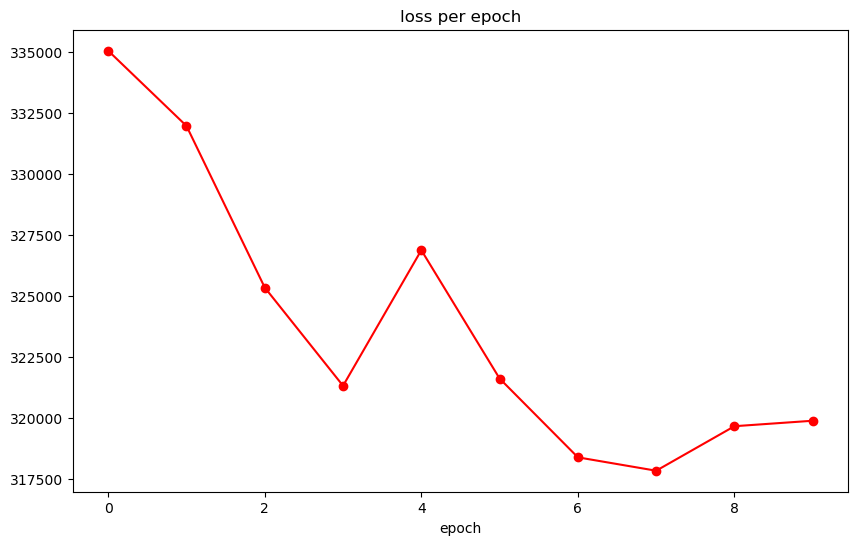

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
#print(loss_values)
plt.plot(loss_values,'-ro')
plt.title("loss per epoch")
plt.xlabel("epoch")

Text(0, 0.5, 'accuracy')

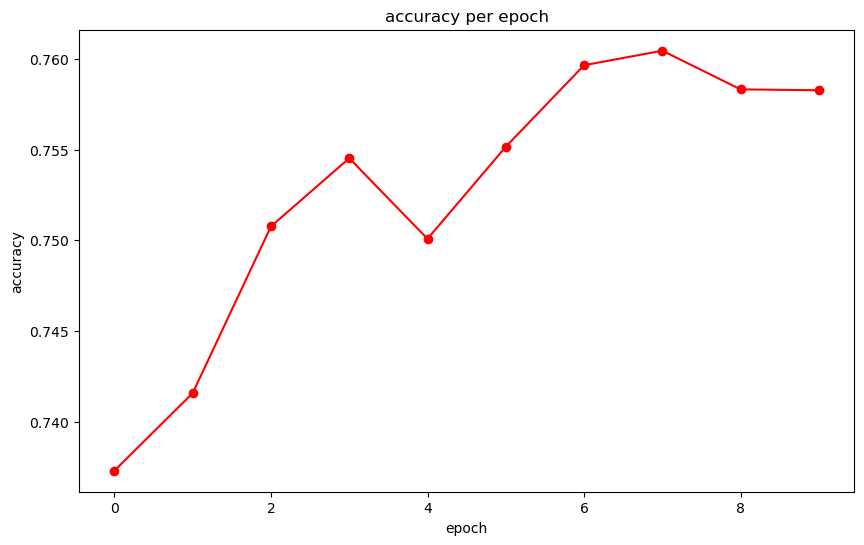

In [28]:
plt.plot(accuracies,'-ro')
plt.title("accuracy per epoch")
plt.xlabel("epoch")
plt.ylabel("accuracy")

### Final result

**The Simple Model achieved Accuracy above 75%**

## 2. Classification using Deep Learning model on MNIST

Architecture of the Deep Learning network is:

* (Input) -> [batch_size, 28, 28, 1] >> Apply 32 filter of [5x5]
* (Convolutional layer 1) -> [batch_size, 28, 28, 32]
* (ReLU 1) -> [?, 28, 28, 32]
* (Max pooling 1) -> [?, 14, 14, 32]
* (Convolutional layer 2) -> [?, 14, 14, 64]
* (ReLU 2) -> [?, 14, 14, 64]
* (Max pooling 2) -> [?, 7, 7, 64]
* [fully connected layer 3] -> [1x1024]
* [ReLU 3] -> [1x1024]
* [Drop out] -> [1x1024]
* [fully connected layer 4] -> [1x10]

### Initial Parameters

In [32]:
width = 28 # width of the image in pixels 
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image 
class_output = 10 # number of possible classifications for the problem

### Converting images of the data set to tensors

In [34]:
x_image_train = tf.reshape(x_train, [-1,28,28,1])  
x_image_train = tf.cast(x_image_train, 'float32') 

x_image_test = tf.reshape(x_test, [-1,28,28,1]) 
x_image_test = tf.cast(x_image_test, 'float32') 

#creating new dataset with reshaped inputs
train_ds2 = tf.data.Dataset.from_tensor_slices((x_image_train, y_train)).batch(50)
test_ds2 = tf.data.Dataset.from_tensor_slices((x_image_test, y_test)).batch(50)

### Convolutional Layer 1

In [35]:
W_conv1 = tf.Variable(tf.random.truncated_normal([5, 5, 1, 32], stddev=0.1, seed=0))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # need 32 biases for 32 outputs

In [36]:
def convolve1(x):
    return(
        tf.nn.conv2d(x, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)

#### RelU activation Function

In [37]:
def h_conv1(x): 
    return(tf.nn.relu(convolve1(x)))

#### Max pooling

In [38]:
def conv1(x):
    return tf.nn.max_pool(h_conv1(x), ksize=[1, 2, 2, 1], 
                          strides=[1, 2, 2, 1], padding='SAME')

### Convolutional Layer 2


In [40]:
W_conv2 = tf.Variable(tf.random.truncated_normal([5, 5, 32, 64], stddev=0.1, seed=1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64])) #need 64 biases for 64 outputs

In [41]:
def convolve2(x): 
    return( 
    tf.nn.conv2d(conv1(x), W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)

#### ReLU activation function

In [42]:
def h_conv2(x):
    return tf.nn.relu(convolve2(x))

#### Max pooling

In [43]:
def conv2(x):  
    return(
    tf.nn.max_pool(h_conv2(x), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME'))

### Fully Connected Layer

#### Flattening second layer

In [46]:
def layer2_matrix(x):
    return tf.reshape(conv2(x), [-1, 7 * 7 * 64])

In [47]:
W_fc1 = tf.Variable(tf.random.truncated_normal([7 * 7 * 64, 1024], stddev=0.1, seed = 2))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs

#### Apply weights and biases

In [48]:
def fcl(x):
    return tf.matmul(layer2_matrix(x), W_fc1) + b_fc1

#### ReLU activation function

In [49]:
def h_fc1(x):
    return tf.nn.relu(fcl(x))

#### Dropout Layer

In [50]:
keep_prob=0.5
def layer_drop(x): return tf.nn.dropout(h_fc1(x), keep_prob)

#### Softmax Layer

In [52]:
W_fc2 = tf.Variable(tf.random.truncated_normal([1024, 10], stddev=0.1, seed = 2)) #1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]

In [53]:
def fc(x):
    return tf.matmul(layer_drop(x), W_fc2) + b_fc2

#### Apply softmax activation function

In [59]:
def y_CNN(x):
    return tf.nn.softmax(fc(x))

### Training the model

In [55]:
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))

#### Optimizer

In [56]:
optimizer = tf.keras.optimizers.Adam(1e-4)

In [57]:
variables = [W_conv1, b_conv1, W_conv2, b_conv2, 
             W_fc1, b_fc1, W_fc2, b_fc2, ]

def train_step(x, y):
    with tf.GradientTape() as tape:
        current_loss = cross_entropy( y, y_CNN( x ))
        grads = tape.gradient( current_loss , variables )
        optimizer.apply_gradients( zip( grads , variables ) )
        return current_loss.numpy()

In [60]:
loss_values=[]
accuracies = []
epochs = 1

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds2:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%50==0: #reporting intermittent batch statistics
            correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
            #  accuracy
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss),
                     "accuracy", str(accuracy)) 
            
    current_loss = cross_entropy( y_train, y_CNN( x_image_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) )  

epoch  0 batch 50 loss: 101.41582 accuracy 0.34
epoch  0 batch 100 loss: 65.84878 accuracy 0.64
epoch  0 batch 150 loss: 27.461287 accuracy 0.78
epoch  0 batch 200 loss: 21.768959 accuracy 0.88
epoch  0 batch 250 loss: 33.211197 accuracy 0.82
epoch  0 batch 300 loss: 17.907818 accuracy 0.82
epoch  0 batch 350 loss: 20.526367 accuracy 0.86
epoch  0 batch 400 loss: 17.936607 accuracy 0.9
epoch  0 batch 450 loss: 32.60258 accuracy 0.86
epoch  0 batch 500 loss: 11.807394 accuracy 0.88
epoch  0 batch 550 loss: 10.53099 accuracy 0.94
epoch  0 batch 600 loss: 16.493547 accuracy 0.96
epoch  0 batch 650 loss: 13.782297 accuracy 0.86
epoch  0 batch 700 loss: 7.1836405 accuracy 0.94
epoch  0 batch 750 loss: 25.499521 accuracy 0.9
epoch  0 batch 800 loss: 7.687255 accuracy 0.98
epoch  0 batch 850 loss: 19.30201 accuracy 0.96
epoch  0 batch 900 loss: 14.556013 accuracy 0.94
epoch  0 batch 950 loss: 18.802406 accuracy 0.92
epoch  0 batch 1000 loss: 13.238857 accuracy 0.92
epoch  0 batch 1050 loss: 4

### Final Result

**The Deep Learning model achieved the accuracy of 93% after just one epoch.**